In [22]:
# 🧪 Hierarchical Clustering Example: Animal Grouping 🐾

# ----------------------------
# Step 1: Import necessary libraries
# ----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Import our custom clustering class
from hierarchical_clustering import HierarchicalClustering

In [23]:
# ----------------------------
# Step 2: Create toy dataset
# ----------------------------

# ❓ We're using synthetic data to simulate 8 animals with 2 features:
#     - Size (1 = small, 10 = large)
#     - Speed (1 = slow, 10 = fast)
X = np.array([
    [1, .5],   # 🐌 Snail
    [2, 1],   # 🐢 Turtle
    [3, 2],   # 🦔 Hedgehog
    [3.5, 4],   # 🐈 Cat
    [4, 5.5],   # 🐕 Dog
    [6.5, 6.5],   # 🐅 Tiger
    [7, 7],   # 🐎 Horse
    [9, 5],   # 🐘 Elephant
])

# Optional labels to track the animals
labels = ["Snail", "Turtle", "Hedgehog", "Cat", "Dog", "Tiger", "Horse", "Elephant"]


In [ ]:
# ----------------------------
# Step 3: Initialize model
# ----------------------------

# ⚙️ Create the clustering model

# We're using a custom HierarchicalClustering class — likely a wrapper around SciPy.
# You specify two key things:
#     1. method → how to calculate distance between clusters (linkage method)
#     2. metric → how to measure distance between points

# ----------------------------
# 🔗 LINKAGE METHODS (method=...)
# ----------------------------
# 'ward'     → Minimizes total within-cluster variance (requires Euclidean only)
# 'single'   → Distance between the closest points in two clusters (can cause "chaining")
# 'complete' → Distance between the farthest points (tight, compact clusters)
# 'average'  → Average distance between all pairs (balanced approach)
# 'centroid' → Distance between centroids (can cause dendrogram inversions)
# 'median'   → Similar to centroid, but uses medians

# ----------------------------
# 📏 DISTANCE METRICS (metric=...)
# ----------------------------
# 'euclidean'     → Standard straight-line distance (most common)
# 'manhattan'     → Sum of absolute differences (like city blocks)
# 'cosine'        → Angle-based similarity (common in text data)
# 'chebyshev', etc. → Other advanced metrics

# ✅ In this example:
# - method="ward": minimizes variance within clusters
# - metric="euclidean": classic straight-line distance
model = HierarchicalClustering(method="ward", metric="euclidean")

# 🔧 Fit the model to our animal dataset

# This computes the clustering hierarchy:
# 1. Calculates all pairwise distances between points using the chosen metric
# 2. Starts with each point as its own cluster
# 3. Iteratively merges the two clusters that are closest (based on the linkage method)
# 4. Stores the sequence of merges and distances in a linkage matrix
# 5. This matrix becomes the backbone of the dendrogram and clustering

model.fit(X)


C:\Users\Logan\AppData\Local\Temp\ipykernel_13292\2275781295.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


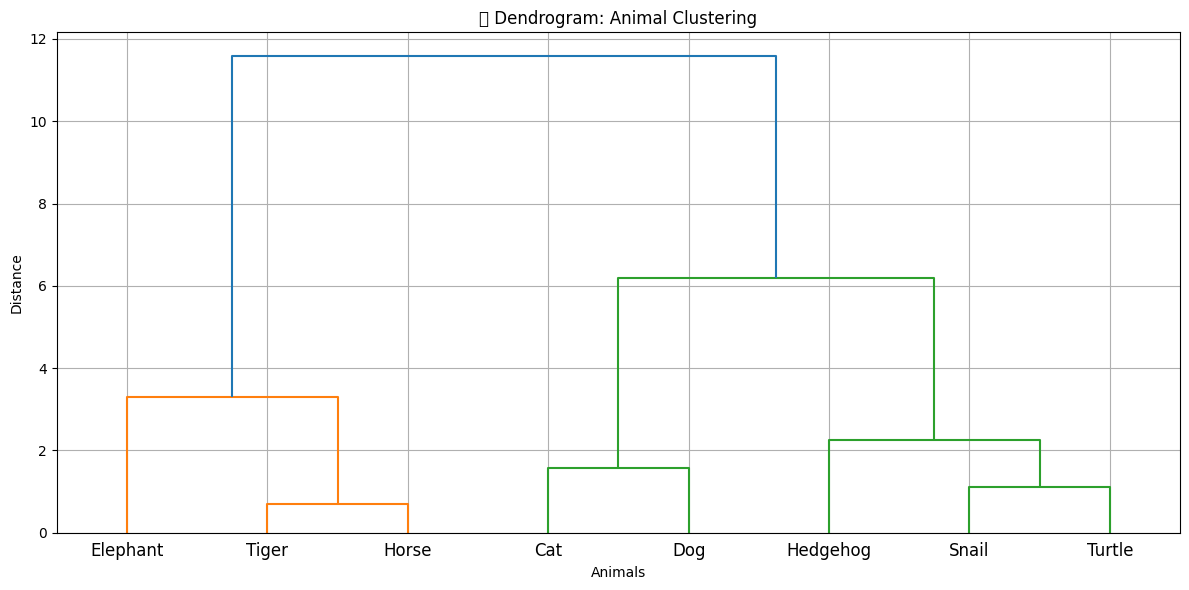

In [ ]:
# ----------------------------
# Step 4: Visualize the dendrogram 🌳
# ----------------------------

# 📊 Dendrogram shows how clusters merge over time
# Each "U" shape represents a merge, and the vertical axis shows distance between merged clusters

# 🗃️ linkage_matrix stores how clusters were formed:
# Each row = [index of cluster A, index of cluster B, distance between them, number of points in new cluster]
linkage_matrix = model.linkage_matrix

# 🖼️ Plotting the dendrogram using scipy's built-in function
plt.figure(figsize=(12, 6))  # Set figure size
dendrogram(linkage_matrix, labels=labels)  # Pass the linkage matrix and animal labels
plt.title("📊 Dendrogram: Animal Clustering")  # Add title
plt.xlabel("Animals")  # Label x-axis
plt.ylabel("Distance")  # Label y-axis
plt.grid(True)  # Optional grid for readability
plt.tight_layout()  # Prevent label cutoff
plt.show()  # Display the dendrogram

In [ ]:
# ----------------------------
# Step 5: Choose number of clusters
# ----------------------------

# 📈 After visualizing the dendrogram in Step 4, it's time to "cut" the tree.

# ⛏️ Dendrograms represent a hierarchy — all points eventually merge into one mega-cluster.
# But for real-world use, we usually want a **fixed number of meaningful groups**.
# Choosing where to "cut" the dendrogram flattens this tree into that many clusters.

# 👀 How to choose `n_clusters`:
# - Look for **big vertical jumps** in the dendrogram (large distances between merges).
# - Cutting just **below** a tall link separates your data into tighter groups.
# - In this example, we assume 3 groups makes sense by visual inspection.

# 🎯 This step performs **flat clustering**:
# It traverses the linkage matrix from `model.fit(X)` and slices the tree into `n_clusters` parts.

# 🧠 Behind the scenes:
# - The model has already built a full tree of merges.
# - `get_clusters(n_clusters=3)` climbs up that tree and cuts it so there are 3 disconnected clusters.
# - It returns a list of cluster IDs (e.g. [0, 0, 0, 1, 1, 2, 2, 2]) that map to the original data points.

cluster_labels = model.get_clusters(n_clusters=3)

# 🔍 cluster_labels now holds a flat assignment:
# - Each number represents a cluster ID (e.g., Cluster 0, Cluster 1, etc.)
# - These are integers, not sorted by size or label — just by the order produced during cutting.

# 🖨️ Print out the assignments clearly, matching each animal to its cluster.
# This helps us understand and verify the grouping (e.g., do all fast animals go together?)
for animal, cluster in zip(labels, cluster_labels):
    print(f"{animal} → Cluster {cluster}")


Snail → Cluster 3
Turtle → Cluster 3
Hedgehog → Cluster 3
Cat → Cluster 2
Dog → Cluster 2
Tiger → Cluster 1
Horse → Cluster 1
Elephant → Cluster 1


C:\Users\Logan\AppData\Local\Temp\ipykernel_13292\1904662950.py:17: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


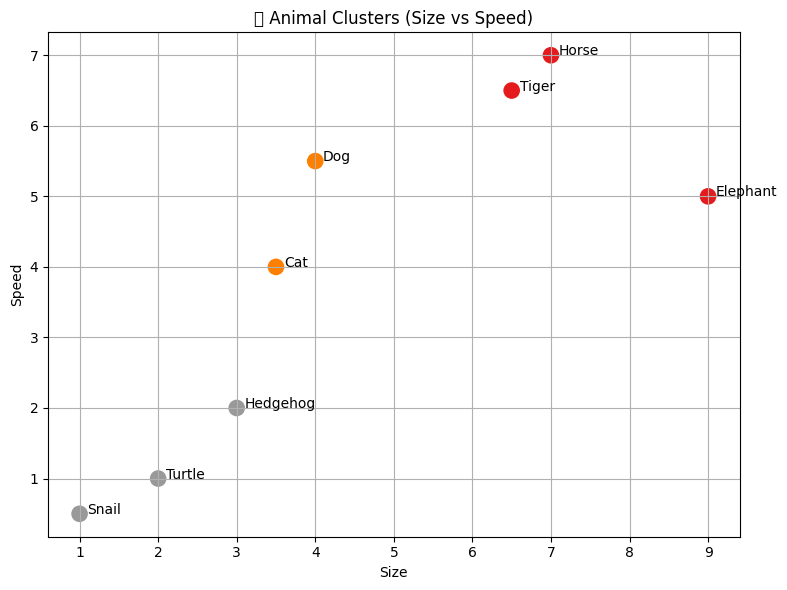

In [27]:
# ----------------------------
# Step 6: Visualize the clusters in 2D
# ----------------------------

# ❓ Plot the points in 2D space (Size vs Speed), colored by cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap="Set1", s=120)

# Annotate each point with the animal name
for i, label in enumerate(labels):
    plt.text(X[i, 0]+0.1, X[i, 1], label, fontsize=10)

plt.title("🐾 Animal Clusters (Size vs Speed)")
plt.xlabel("Size")
plt.ylabel("Speed")
plt.grid(True)
plt.tight_layout()
plt.show()